In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import seaborn as sns

In [2]:
df = pd.read_csv('Downloads/results.csv')

In [3]:
df

,10k,name,division,25k,gender,age,official,bib,genderdiv,ctz,...,overall,pace,state,30k,5k,half,20k,country,city,40k
0,17.37,"Yamamoto, Hiroyuki",8,47.67,M,47,85.25,W1,8,NaN,...,8,3.27,NaN,59.18,8.02,39.72,37.65,JPN,Fukuoka,80.43
1,32.58,"Jeptoo, Rita",1,82.43,F,33,138.95,F1,1,NaN,...,21,5.30,NaN,99.33,16.22,69.47,65.83,KEN,Eldoret,132.10
2,16.62,"Van Dyk, Ernst F.",1,45.80,M,41,80.60,W2,1,NaN,...,1,3.08,NaN,56.45,7.75,38.03,36.10,RSA,Paarl,76.10
3,32.57,"Dibaba, Mare",3,82.43,F,24,140.58,F2,3,NaN,...,27,5.37,NaN,99.33,16.20,69.47,65.83,ETH,Shoa,132.95
4,17.12,"Hokinoue, Kota",2,46.37,M,40,81.23,W3,2,NaN,...,2,3.10,NaN,57.03,8.02,38.60,36.58,JPN,Nogata Fukuoka,76.72
5,32.58,"Sumgong, Jemima Jelagat",4,82.45,F,29,140.68,F3,4,NaN,...,28,5.37,NaN,99.33,16.22,69.47,65.83,KEN,Nandi,132.95
6,17.65,"Hug, Marcel E.",4,47.67,M,28,84.65,W4,4,NaN,...,4,3.23,NaN,58.60,8.38,39.72,37.65,SUI,Neuenkirch,79.83
7,30.48,"Geneti, Markos",5,76.95,M,29,129.83,5,5,NaN,...,5,4.97,NaN,92.52,15.17,64.85,61.62,ETH,Addis Ababa,122.80
8,17.12,"Soejima, Masazumi",3,46.37,M,43,81.23,W6,3,NaN,...,3,3.10,NaN,57.03,8.00,38.60,36.60,JPN,Isahaya,76.70
9,30.48,"Hall, Ryan",20,77.68,M,31,137.83,6,20,NaN,...,20,5.27,CA,94.78,15.15,65.23,61.78,USA,Redding,129.83


DATA EXPLORATION

In [4]:
pd.DataFrame(df.isnull().sum()/df.shape[0]*100)

,0
10k,0.000000
name,0.000000
division,0.000000
25k,0.000000
gender,0.000000
age,0.000000
official,0.000000
bib,0.000000
genderdiv,0.000000
ctz,96.110555


In [5]:
df['gender'] = df['gender'].str.replace('M','0')
df['gender'] = df['gender'].str.replace('F','1')
df['gender'] = pd.to_numeric(df['gender'], errors='coerce')

In [6]:
df.describe()

,division,gender,age,official,genderdiv,overall,pace
count,31984.000000,31984.000000,31984.000000,31984.000000,31984.000000,31984.000000,31984.000000
mean,1932.563032,0.449193,42.407079,242.997314,8051.044741,15939.587825,9.275658
std,1715.228694,0.497420,11.316496,52.300431,4754.005626,9232.978224,1.992486
min,1.000000,0.000000,18.000000,80.600000,1.000000,1.000000,3.080000
25%,610.000000,0.000000,33.000000,205.527500,3972.000000,7943.750000,7.850000
50%,1425.000000,0.000000,42.000000,232.370000,7970.000000,15939.500000,8.870000
75%,2611.000000,1.000000,50.000000,273.235000,11968.000000,23935.250000,10.430000
max,6979.000000,1.000000,81.000000,538.880000,17575.000000,31931.000000,20.570000


In [7]:
df.dtypes

10k           object
name          object
division       int64
25k           object
gender         int64
age            int64
official     float64
bib           object
genderdiv      int64
ctz           object
35k           object
overall        int64
pace         float64
state         object
30k           object
5k            object
half          object
20k           object
country       object
city          object
40k           object
dtype: object

In [8]:
df.replace('-', '0')

,10k,name,division,25k,gender,age,official,bib,genderdiv,ctz,...,overall,pace,state,30k,5k,half,20k,country,city,40k
0,17.37,"Yamamoto, Hiroyuki",8,47.67,0,47,85.25,W1,8,NaN,...,8,3.27,NaN,59.18,8.02,39.72,37.65,JPN,Fukuoka,80.43
1,32.58,"Jeptoo, Rita",1,82.43,1,33,138.95,F1,1,NaN,...,21,5.30,NaN,99.33,16.22,69.47,65.83,KEN,Eldoret,132.10
2,16.62,"Van Dyk, Ernst F.",1,45.80,0,41,80.60,W2,1,NaN,...,1,3.08,NaN,56.45,7.75,38.03,36.10,RSA,Paarl,76.10
3,32.57,"Dibaba, Mare",3,82.43,1,24,140.58,F2,3,NaN,...,27,5.37,NaN,99.33,16.20,69.47,65.83,ETH,Shoa,132.95
4,17.12,"Hokinoue, Kota",2,46.37,0,40,81.23,W3,2,NaN,...,2,3.10,NaN,57.03,8.02,38.60,36.58,JPN,Nogata Fukuoka,76.72
5,32.58,"Sumgong, Jemima Jelagat",4,82.45,1,29,140.68,F3,4,NaN,...,28,5.37,NaN,99.33,16.22,69.47,65.83,KEN,Nandi,132.95
6,17.65,"Hug, Marcel E.",4,47.67,0,28,84.65,W4,4,NaN,...,4,3.23,NaN,58.60,8.38,39.72,37.65,SUI,Neuenkirch,79.83
7,30.48,"Geneti, Markos",5,76.95,0,29,129.83,5,5,NaN,...,5,4.97,NaN,92.52,15.17,64.85,61.62,ETH,Addis Ababa,122.80
8,17.12,"Soejima, Masazumi",3,46.37,0,43,81.23,W6,3,NaN,...,3,3.10,NaN,57.03,8.00,38.60,36.60,JPN,Isahaya,76.70
9,30.48,"Hall, Ryan",20,77.68,0,31,137.83,6,20,NaN,...,20,5.27,CA,94.78,15.15,65.23,61.78,USA,Redding,129.83


In [9]:
numeric = ['10k','25k','age','official','35k','overall','pace','30k','5k','half','20k','40k']
df[numeric] = df[numeric].apply(pd.to_numeric, errors = 'coerce', axis=1)

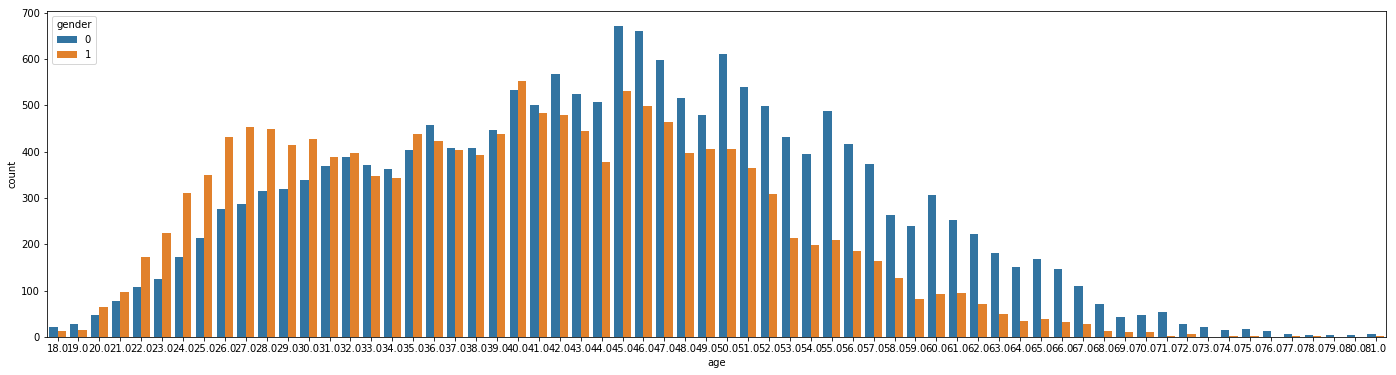

In [10]:
plt.figure(figsize = (24,6))
sns.countplot(x='age', hue = 'gender', data = df)

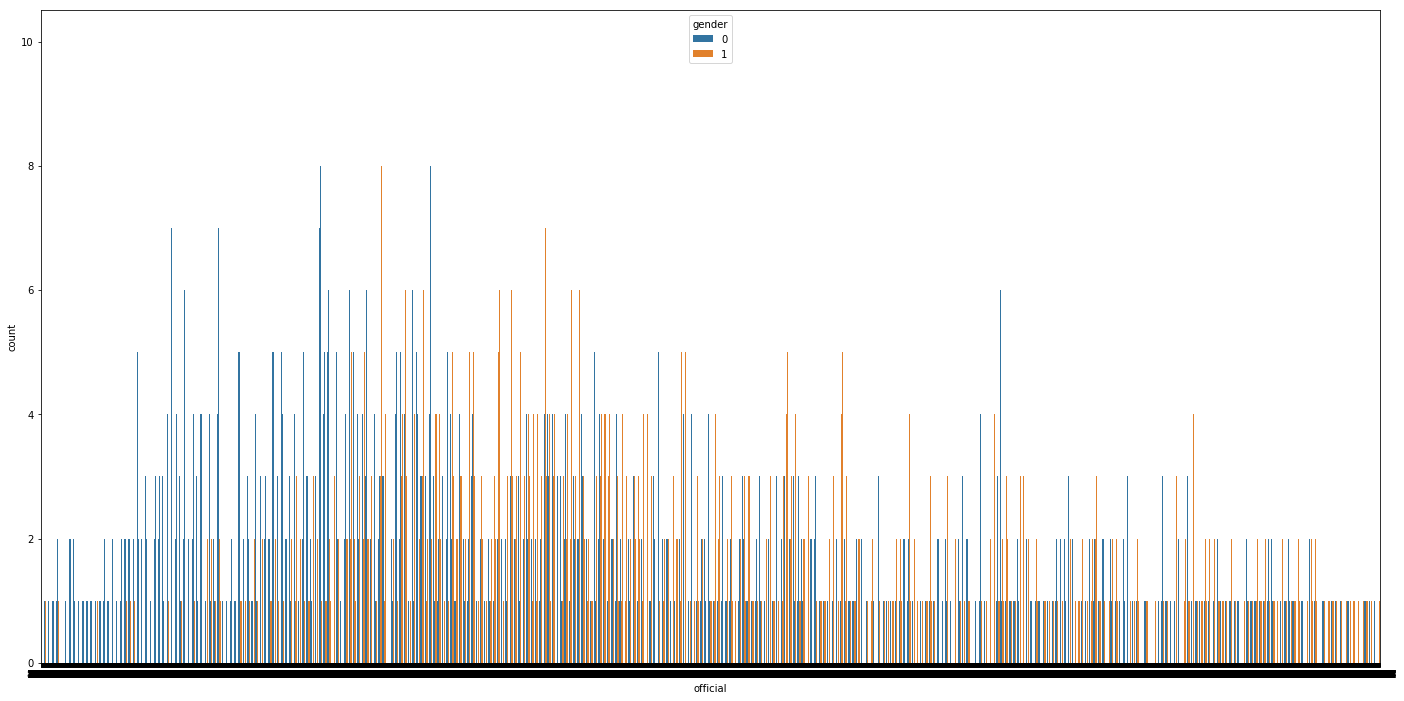

In [11]:
plt.figure(figsize = (24,12))
sns.countplot(x='official', hue = 'gender', data = df)

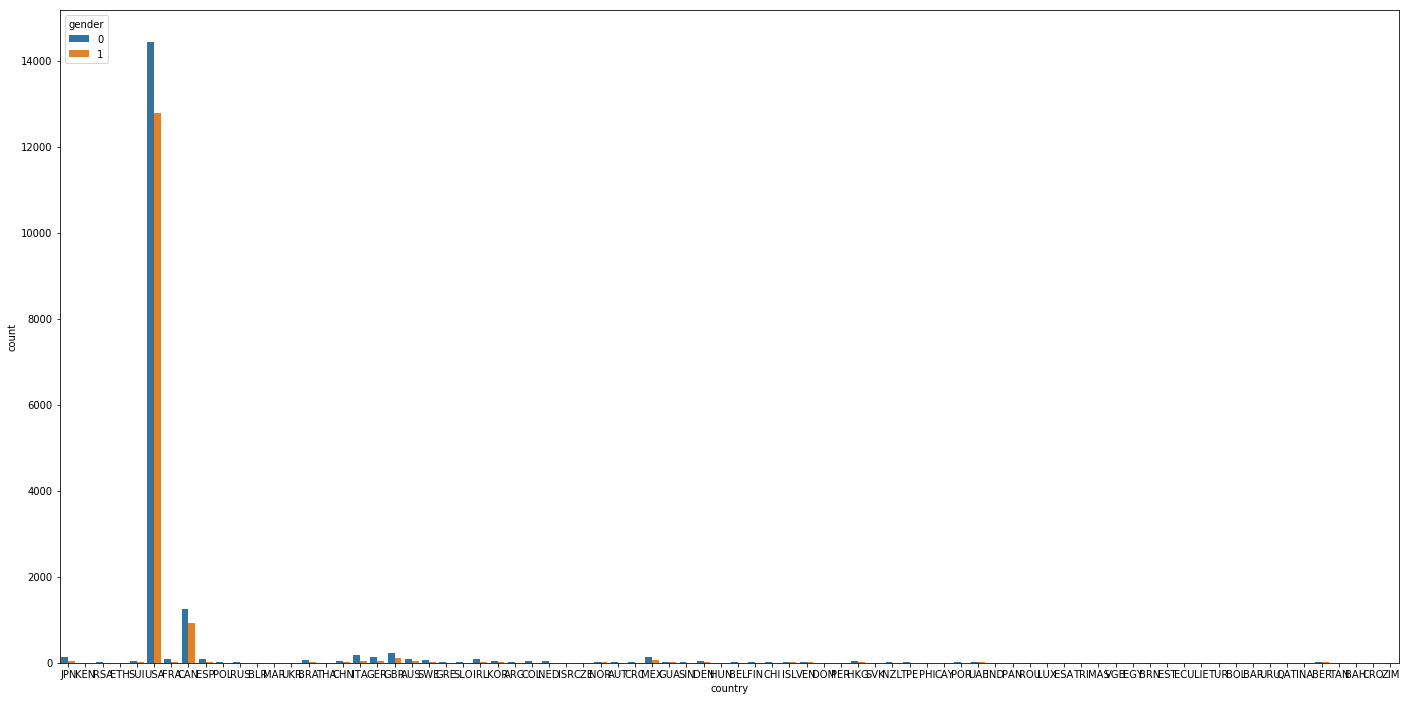

In [12]:
plt.figure(figsize = (24,12))
sns.countplot(x='country', hue = 'gender', data = df)

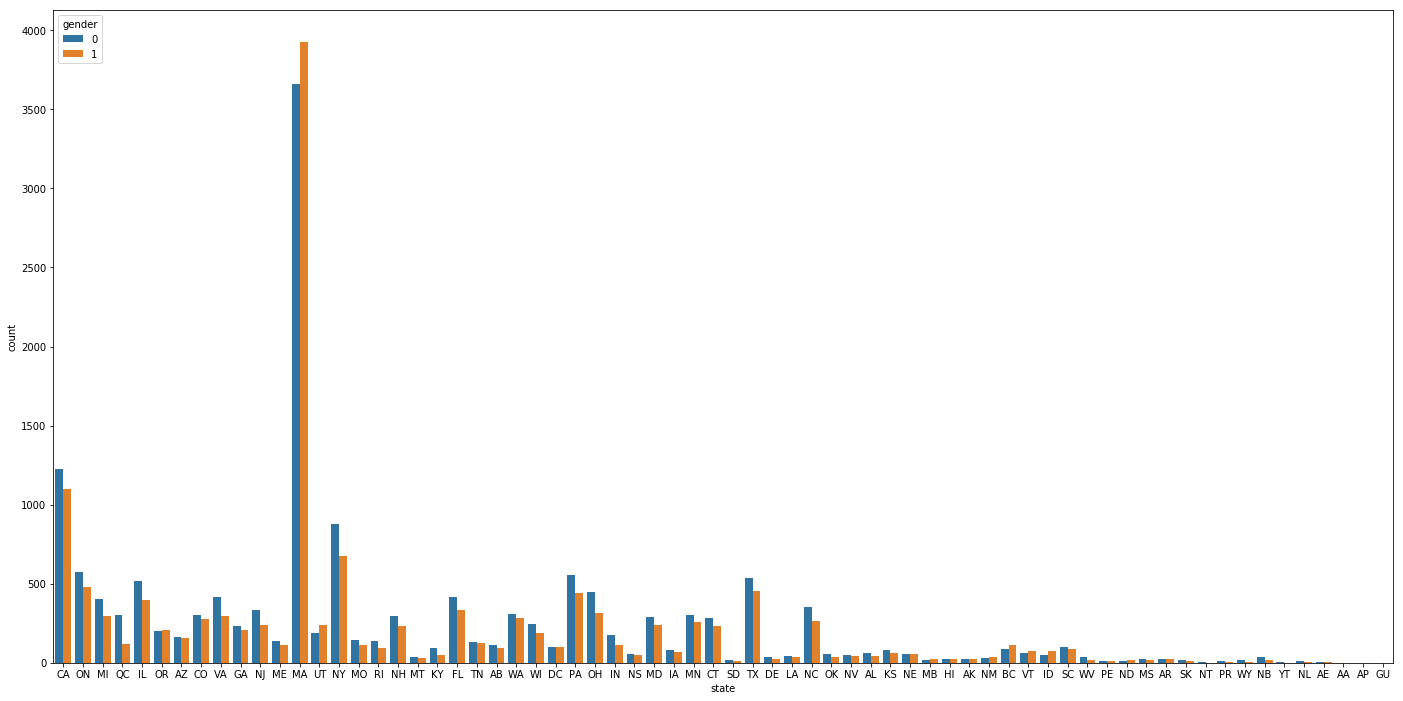

In [13]:
plt.figure(figsize = (24,12))
sns.countplot(x='state', hue = 'gender', data = df)

In [14]:
df['country'] = [1 if x == 'USA' or x == 'CAN' else 0 for x in df.loc[:,'country']]

In [15]:
df.describe()

,10k,division,25k,gender,age,official,genderdiv,35k,overall,pace,30k,5k,half,20k,country,40k
count,31934.000000,31984.000000,31768.000000,31984.000000,31984.000000,31984.000000,31984.000000,31950.000000,31984.000000,31984.000000,31944.000000,31932.000000,31912.000000,31933.000000,31984.000000,31945.000000
mean,51.799275,1932.563032,133.612055,0.449193,42.407079,242.997314,8051.044741,196.857605,15939.587825,9.275658,164.571219,25.755559,111.664566,105.711669,0.919460,229.001490
std,8.965513,1715.228694,25.596958,0.497420,11.316496,52.300431,4754.005626,41.979107,9232.978224,1.992486,33.953683,4.327830,21.061188,19.780525,0.272132,49.159902
min,16.620000,1.000000,45.800000,0.000000,18.000000,80.600000,1.000000,67.420000,1.000000,3.080000,56.450000,7.750000,38.030000,36.100000,0.000000,76.100000
25%,45.400000,610.000000,115.470000,0.000000,33.000000,205.527500,3972.000000,167.122500,7943.750000,7.850000,140.670000,22.650000,96.845000,91.750000,1.000000,193.820000
50%,50.330000,1425.000000,128.875000,0.000000,42.000000,232.370000,7970.000000,188.170000,15939.500000,8.870000,157.730000,25.080000,107.830000,102.150000,1.000000,218.850000
75%,57.170000,2611.000000,147.735000,1.000000,50.000000,273.235000,11968.000000,220.170000,23935.250000,10.430000,182.880000,28.470000,123.070000,116.520000,1.000000,257.450000
max,112.380000,6979.000000,289.020000,1.000000,81.000000,538.880000,17575.000000,449.330000,31931.000000,20.570000,376.380000,86.950000,236.670000,224.350000,1.000000,508.350000


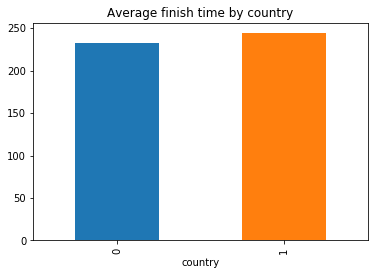

In [16]:
df['official'].groupby(df['country']).aggregate(np.average).plot(kind = 'bar', title = 'Average finish time by country')

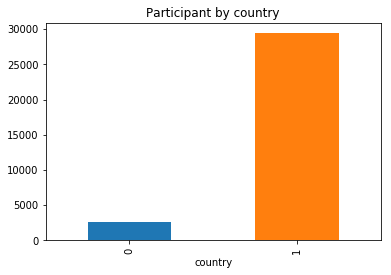

In [17]:
df['official'].groupby(df['country']).aggregate(len).plot(kind = 'bar', title = 'Participant by country')

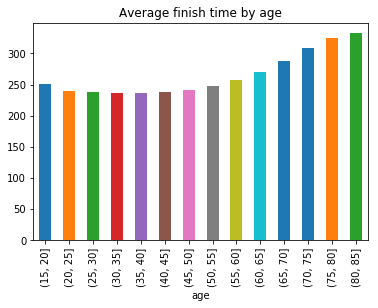

In [18]:
df['official'].groupby(pd.cut(df['age'], range(15,90,5))).aggregate(np.average).plot(kind = 'bar', title = 'Average finish time by age')

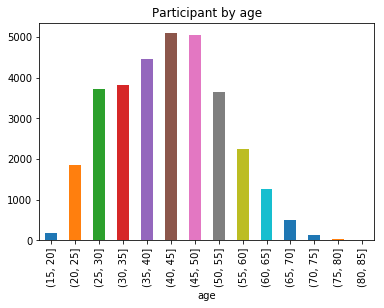

In [19]:
df['official'].groupby(pd.cut(df['age'], range(15,90,5))).aggregate(len).plot(kind = 'bar', title = 'Participant by age')

CLUSTERING

In [20]:
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.metrics import silhouette_score

In [21]:
df.drop(columns = ['name', 'ctz', 'state', 'city', 'bib'], inplace = True)

In [22]:
df.dropna(inplace = True)

In [ ]:
for k in range(2,8):
    kmeans = KMeans(n_clusters = k, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0, precompute_distances = True, n_jobs=-1).fit(df)
    labels = kmeans.labels_
    silscore = silhouette_score(df, labels, metric = 'euclidean')
    print('Cluster = {}, silhouette score = {}'.format(k, silscore))

In [ ]:
plt.plot(silscore)

In [ ]:
clustered = KMeans(n_clusters = ?, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0).fit_predict(df)
df['cluster'] = clustered

In [ ]:
df['cluster'].value_counts

In [ ]:
clt1 = df[df.cluster == 0]


In [ ]:
clt1.describe()

In [ ]:
sns.countplot('age', data = clt1, hue = 'gender')

In [ ]:
sns.countplot(x ='age', y = 'official', data = clt1, hue = 'gender')

In [ ]:
clt2.describe()

In [ ]:
sns.countplot('age', data = clt2, hue = 'gender')

In [ ]:
sns.countplot(x ='age', y = 'official', data = clt2, hue = 'gender')